In [1]:
!pwd

/Users/Puneetha_Pai/learning/session/dvc_demo/notebooks


In [2]:
path = '../'
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv(f'{path}/data/iris.csv')
df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal length,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal width,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal length,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal width,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8
class,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [4]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.intercept_, model.coef_, model.score(X_train, y_train), model.score(X_test, y_test)

(array([ 10.10567143,   1.41713728, -11.52280871]),
 array([[-0.49213937,  0.77084526, -2.34692053, -0.95135904],
        [ 0.64227003, -0.35931477, -0.22237973, -0.80766416],
        [-0.15013066, -0.41153049,  2.56930026,  1.7590232 ]]),
 0.9666666666666667,
 1.0)

<BarContainer object of 4 artists>

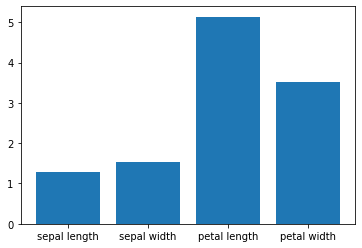

In [6]:
import numpy as np
feature_imp = np.abs(model.coef_).sum(axis=0)
plt.bar(df.columns[:-1], feature_imp)

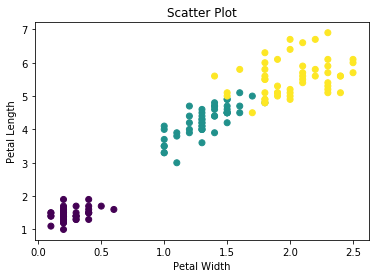

In [7]:
plt.figure()
plt.scatter(X.iloc[:, -1], X.iloc[:, -2], c=y)
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Scatter Plot')
plt.show()

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

In [9]:
pca.explained_variance_, pca.explained_variance_ratio_

(array([4.22824171, 0.24267075]), array([0.92461872, 0.05306648]))

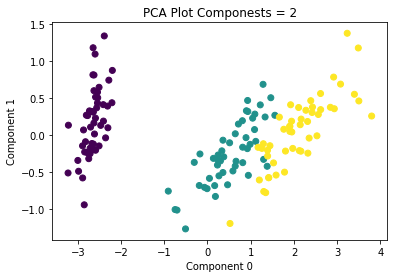

In [10]:
plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.title('PCA Plot Componests = 2')
plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.show()

In [11]:
def fit_model(X: np.ndarray, y: np.ndarray, model=LogisticRegression()):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
    model.fit(X_train, y_train)
    print(f'Training Accuracy: {model.score(X_train, y_train)}')
    print(f'Testing Accuracy : {model.score(X_test, y_test)}')
    return model

old_model = fit_model(X, y, LogisticRegression())
new_model = fit_model(X_pca, y, LogisticRegression())

Training Accuracy: 0.9916666666666667
Testing Accuracy : 0.8666666666666667
Training Accuracy: 0.975
Testing Accuracy : 0.8666666666666667


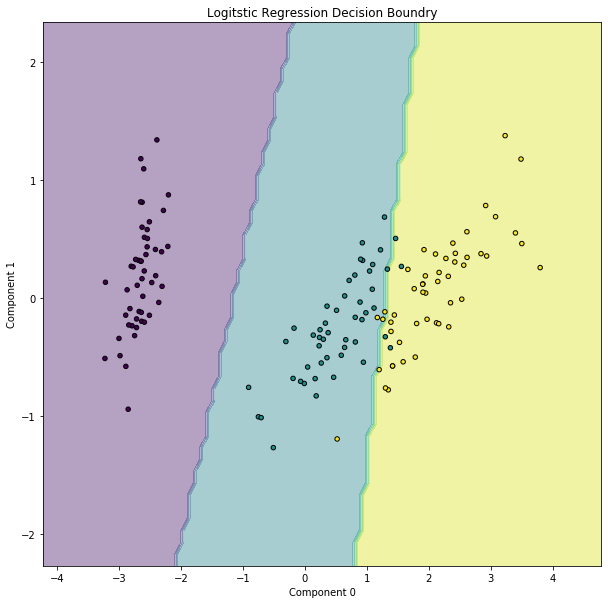

In [12]:
X, y = X_pca, y
clf = new_model

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.title('Logitstic Regression Decision Boundry')
plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.show()